# All Dog Reports

In [2]:
## this code cell is also marked as 'narrative'
import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn

import duckdb, sqlalchemy

In [3]:
%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

Research Question: 

In [4]:
all_dogs_df = pd.read_csv("alldogsreport1.csv")
all_dogs_df.head(200)


,Dog Name,Tattoo,Gender,Breed,Color,Birthdate,Dam,Sire,Current Status Date,Status,Region,Graduation Date,Graduate Team Location
0,Everest,2E322,Male,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,NaN,NaN
1,Ellie,4E322,Female,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,NaN,NaN
2,Echo,5E322,Female,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,NaN,NaN
3,Eclaire,6E322,Female,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,NaN,NaN
4,Elias,3E322,Male,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Carson SSD,2N01266,Male,LR,B,4/15/2022,Dakota - S - 4D417 - LRBF *NOP*,Quincy SSD Shiloh II PADS - QUINCY SSD - LRBM,6/23/2022,Other School,NaN,NaN,NaN
196,Yeti,1Y22,Female,LR,Y,4/13/2022,Janet - 2J20 - LRYF,Garcia - 4G16 - LRYM,6/8/2022,Puppy Raising,Columbus Puppy Raising Region,NaN,NaN
197,Yolanda,3Y22,Female,LR,Y,4/13/2022,Janet - 2J20 - LRYF,Garcia - 4G16 - LRYM,7/15/2022,Puppy Raising,Eastern MA Puppy Raising Region,NaN,NaN
198,Yaeger,4Y22,Male,LR,Y,4/13/2022,Janet - 2J20 - LRYF,Garcia - 4G16 - LRYM,6/28/2022,Puppy Raising,Central CT Puppy Raising Region,NaN,NaN


In [5]:
print(list(all_dogs_df.columns))

['Dog Name', 'Tattoo', 'Gender', 'Breed', 'Color', 'Birthdate', 'Dam', 'Sire ', 'Current Status Date', 'Status', 'Region', 'Graduation Date', 'Graduate Team Location']


In [6]:
regional_dogs = all_dogs_df.groupby("Region")
regional_dogs.head(200)

,Dog Name,Tattoo,Gender,Breed,Color,Birthdate,Dam,Sire,Current Status Date,Status,Region,Graduation Date,Graduate Team Location
82,Nikon,2NN22,Male,LR,B,7/5/2022,Madeline - 7M20 - LRYF,Odin - 5OO19 - LRBM,9/3/2022,Puppy Raising,Northern CT Puppy Raising Region,NaN,NaN
83,Nova,3NN22,Female,LR,B,7/5/2022,Madeline - 7M20 - LRYF,Odin - 5OO19 - LRBM,9/2/2022,Puppy Raising,SWCT Puppy Raising Region,NaN,NaN
85,Mitch,3MM22,Male,LR,B,7/2/2022,Dawn - 1DD20 - LRYF,Dover - 3D19 - LRBM,8/28/2022,Puppy Raising,Eastern MA Puppy Raising Region,NaN,NaN
86,Maverick,2MM22,Male,LR,Y,7/2/2022,Dawn - 1DD20 - LRYF,Dover - 3D19 - LRBM,8/28/2022,Puppy Raising,Columbus Puppy Raising Region,NaN,NaN
87,Maguire,4MM22,Male,LR,Y,7/2/2022,Dawn - 1DD20 - LRYF,Dover - 3D19 - LRBM,8/28/2022,Puppy Raising,Delmarva Puppy Raising Region,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,Baron,4B20,Male,LR,B,1/7/2020,Lark - 4L18 - LRBF,Finn - 7F315 - LRYM,10/18/2021,Breeding,Central NY Puppy Raising Region,NaN,NaN
1149,Bramble,8B20,Male,LR,Y,1/7/2020,Lark - 4L18 - LRBF,Finn - 7F315 - LRYM,2/22/2022,Released,Prince William Puppy Raising Region,NaN,NaN
1150,Buddy,9B20,Male,LR,B,1/7/2020,Lark - 4L18 - LRBF,Finn - 7F315 - LRYM,2/15/2022,In Training,Cleveland West Puppy Raising Region,NaN,NaN
1151,Barney,10B20,Male,LR,Y,1/7/2020,Lark - 4L18 - LRBF,Finn - 7F315 - LRYM,5/27/2021,Released,Dominion Puppy Raising Region,NaN,NaN


In [7]:
all_dogs_df.loc[all_dogs_df['Status']=='Graduated'].sort_values(by=['Dam'])

,Dog Name,Tattoo,Gender,Breed,Color,Birthdate,Dam,Sire,Current Status Date,Status,Region,Graduation Date,Graduate Team Location
954,Fantasia,1FF20,Female,LR,Y,4/24/2020,Erin - P - 5E315 - LRCHOCF,Yarmouth - 2YY18 - LRYM,6/15/2022,Graduated,Rhode Island Puppy Raising Region,6/15/2022,"Indiana, Kokomo"
1034,Sassy,10S20,Female,LR,B,3/5/2020,Frannie - 2FF17 - LRBF,Ryan - 9RR17 - LRYM,6/18/2022,Graduated,New Hampshire Puppy Raising Region,6/17/2022,"Kentucky, Louisville"
1042,Pilot,2P20,Male,GS,B&T,3/2/2020,Jenny - 1JJ18 - GSB&TF,Chase - 6C315 - GSB&TM,2/14/2022,Graduated,Northern CT Puppy Raising Region,2/14/2022,"Vermont, Colchester"
1043,Pride,3P20,Female,GS,B&T,3/2/2020,Jenny - 1JJ18 - GSB&TF,Chase - 6C315 - GSB&TM,6/4/2022,Graduated,Cleveland West Puppy Raising Region,6/4/2022,"Georgia, Brooklet"
918,Lowell,3LL20,Male,LR,B,5/17/2020,Lava - 4L417 - LRBF,Ryan - 9RR17 - LRYM,5/3/2022,Graduated,Dominion Puppy Raising Region,5/3/2022,"Massachusetts, Brookline"
1005,Wendy,2W20,Female,GS,B&T,3/18/2020,Luna - 3L316 - GSBF,Indy FGDF I28-5M - INDY FGDF - GSB&TM *NOP*,1/15/2022,Graduated,Westchester County Puppy Raising Region,1/15/2022,"South Dakota, Vermillion"
1134,Drake,3D20,Male,LR,B,1/10/2020,Maya - 4MM15 - LRBF,Edgar - 1E315 - LRBM,4/22/2022,Graduated,Bay Puppy Raising Region,4/22/2022,"Minnesota, Richfield"
1014,Ursula,4U20,Female,LR,B,3/15/2020,Oriole - 9O316 - LRYF,Kaplan - 1KK16 - LRBM,8/16/2022,Graduated,Cleveland West Puppy Raising Region,8/16/2022,"Massachusetts, Brookline"
974,Derek,5DD20,Male,LR,B,4/12/2020,Quail - 6Q417 - LRBF,Ryan - 9RR17 - LRYM,5/7/2022,Graduated,Baltimore Puppy Raising Region,5/7/2022,"Oklahoma, Enid"
942,Hobie,1HH20,Male,GS,B&T,5/3/2020,Shea - 5SS18 - GSBF,Cappy - S - 2C315 - GSB&TM,3/18/2022,Graduated,Central NY Puppy Raising Region,3/18/2022,"New York, Woodhaven"


In [8]:
all_dogs_df

,Dog Name,Tattoo,Gender,Breed,Color,Birthdate,Dam,Sire,Current Status Date,Status,Region,Graduation Date,Graduate Team Location
0,Everest,2E322,Male,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,NaN,NaN
1,Ellie,4E322,Female,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,NaN,NaN
2,Echo,5E322,Female,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,NaN,NaN
3,Eclaire,6E322,Female,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,NaN,NaN
4,Elias,3E322,Male,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,Bramble,8B20,Male,LR,Y,1/7/2020,Lark - 4L18 - LRBF,Finn - 7F315 - LRYM,2/22/2022,Released,Prince William Puppy Raising Region,NaN,NaN
1150,Buddy,9B20,Male,LR,B,1/7/2020,Lark - 4L18 - LRBF,Finn - 7F315 - LRYM,2/15/2022,In Training,Cleveland West Puppy Raising Region,NaN,NaN
1151,Barney,10B20,Male,LR,Y,1/7/2020,Lark - 4L18 - LRBF,Finn - 7F315 - LRYM,5/27/2021,Released,Dominion Puppy Raising Region,NaN,NaN
1152,Amos (Noche),1A20,Male,LR,B,1/6/2020,Wanda - S - 2WW15 - LRBF,Joe - 4JJ13 - LRBM,3/4/2020,Released,NaN,NaN,NaN


In [9]:
all_dogs_df.sort_values(by=['Graduation Date']).head(20)

,Dog Name,Tattoo,Gender,Breed,Color,Birthdate,Dam,Sire,Current Status Date,Status,Region,Graduation Date,Graduate Team Location
1005,Wendy,2W20,Female,GS,B&T,3/18/2020,Luna - 3L316 - GSBF,Indy FGDF I28-5M - INDY FGDF - GSB&TM *NOP*,1/15/2022,Graduated,Westchester County Puppy Raising Region,1/15/2022,"South Dakota, Vermillion"
1125,Elana,2E+20,Female,LR,Y,1/12/2020,Yoshi - 1Y17 - LRYF,Oreo - 6O18 - LRBM,10/11/2021,Graduated,Northern CT Puppy Raising Region,10/11/2021,"Wisconsin, Milwaukee"
1042,Pilot,2P20,Male,GS,B&T,3/2/2020,Jenny - 1JJ18 - GSB&TF,Chase - 6C315 - GSB&TM,2/14/2022,Graduated,Northern CT Puppy Raising Region,2/14/2022,"Vermont, Colchester"
942,Hobie,1HH20,Male,GS,B&T,5/3/2020,Shea - 5SS18 - GSBF,Cappy - S - 2C315 - GSB&TM,3/18/2022,Graduated,Central NY Puppy Raising Region,3/18/2022,"New York, Woodhaven"
1134,Drake,3D20,Male,LR,B,1/10/2020,Maya - 4MM15 - LRBF,Edgar - 1E315 - LRBM,4/22/2022,Graduated,Bay Puppy Raising Region,4/22/2022,"Minnesota, Richfield"
1092,Jaedah,3J20,Female,LR,Y,1/29/2020,Terri - 3T18 - LRBF,Charlie - 10CC17 - LRYM,5/18/2022,Graduated,Northern CT Puppy Raising Region,5/18/2022,"Texas, Dallas"
918,Lowell,3LL20,Male,LR,B,5/17/2020,Lava - 4L417 - LRBF,Ryan - 9RR17 - LRYM,5/3/2022,Graduated,Dominion Puppy Raising Region,5/3/2022,"Massachusetts, Brookline"
974,Derek,5DD20,Male,LR,B,4/12/2020,Quail - 6Q417 - LRBF,Ryan - 9RR17 - LRYM,5/7/2022,Graduated,Baltimore Puppy Raising Region,5/7/2022,"Oklahoma, Enid"
954,Fantasia,1FF20,Female,LR,Y,4/24/2020,Erin - P - 5E315 - LRCHOCF,Yarmouth - 2YY18 - LRYM,6/15/2022,Graduated,Rhode Island Puppy Raising Region,6/15/2022,"Indiana, Kokomo"
1139,Coach,4C20,Male,LR,Y,1/8/2020,Wheat - 8W317 - LRBF,Zinc - 8ZZ17 - LRYM,6/18/2022,Graduated,Cleveland East Puppy Raising Region,6/17/2022,"Wisconsin, Milwaukee"


In [17]:
all_dogs_revised_df = pd.read_csv("alldogsreport-revised.csv")
all_dogs_revised_df.head(200)
print(all_dogs_revised_df['Status'][1021])

Graduated


In [44]:
all_dogs_revised_df['Pass_Fail'] = (all_dogs_revised_df['Status'] == 'Graduated') | (all_dogs_revised_df['Status'] == 'Other School')
all_dogs_dropcol_df = all_dogs_revised_df.drop(columns = ['Graduation Date', 'Graduate Team Location'])
all_dogs_dropcol_df['Birthdate'] = pd.to_datetime(all_dogs_dropcol_df['Birthdate'])
all_dogs_dropcol_df['Current Status Date'] = pd.to_datetime(all_dogs_dropcol_df['Current Status Date'])
all_dogs_dropcol_df
clean_dogs_df = all_dogs_dropcol_df.loc[(all_dogs_dropcol_df['Status']=='Graduated') | (all_dogs_dropcol_df['Status']=='Released') | (all_dogs_dropcol_df['Status']=='Other School') | (all_dogs_dropcol_df['Status']=='In Training')]
#clean_dogs_df.head(100)
#clean_dogs_df.loc['Released']
#display(clean_dogs_df)
display(clean_dogs_df.loc[[1021]])


,Dog Name,Tattoo,Gender,Breed,Color,Birthdate,Dam,Sire,Current Status Date,Status,Region,Pass_Fail
1021,Rooney,9R20,Male,LR,Y,2020-03-07,Tiara - 6TT15 - LRBF,Kisco - 6KK18 - LRYM,2022-09-01,Graduated,Monroe NY Puppy Raising Region,True


In [45]:
clean_dogs_df

,Dog Name,Tattoo,Gender,Breed,Color,Birthdate,Dam,Sire,Current Status Date,Status,Region,Pass_Fail
76,Priscilla,5PP22,Female,LR,B,2022-07-19,Zelda - 1Z319 - LRBF,Gerald - 7G20 - LRYM,2022-09-12,Released,NaN,False
80,Nana,4NN22,Female,LR,B,2022-07-05,Madeline - 7M20 - LRYF,Odin - 5OO19 - LRBM,2022-08-29,Released,NaN,False
84,Nifty,5NN22,Female,LR,B,2022-07-05,Madeline - 7M20 - LRYF,Odin - 5OO19 - LRBM,2022-08-29,Released,NaN,False
90,Moana (Dugan),1MM22,Female,LR,B,2022-07-02,Dawn - 1DD20 - LRYF,Dover - 3D19 - LRBM,2022-08-25,Released,NaN,False
95,Leone,2LL22,Male,LR,B,2022-06-21,Via - 6VV18 - LRBF,Elrod - 6E319 - LRBM,2022-08-15,Released,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1149,Bramble,8B20,Male,LR,Y,2020-01-07,Lark - 4L18 - LRBF,Finn - 7F315 - LRYM,2022-02-22,Released,Prince William Puppy Raising Region,False
1150,Buddy,9B20,Male,LR,B,2020-01-07,Lark - 4L18 - LRBF,Finn - 7F315 - LRYM,2022-02-15,In Training,Cleveland West Puppy Raising Region,False
1151,Barney,10B20,Male,LR,Y,2020-01-07,Lark - 4L18 - LRBF,Finn - 7F315 - LRYM,2021-05-27,Released,Dominion Puppy Raising Region,False
1152,Amos (Noche),1A20,Male,LR,B,2020-01-06,Wanda - S - 2WW15 - LRBF,Joe - 4JJ13 - LRBM,2020-03-04,Released,NaN,False


In [47]:
clean_dogs_df.to_csv('clean_dog_data.csv')

In [48]:
all_dogs_revised_df['Status'].unique()

array(['Too Young to Test', 'Ready for Puppy Raiser', 'Released',
       'Puppy Raising', 'Other School', nan, 'In Training', 'Breed Eval',
       'Breeding', 'Graduated'], dtype=object)

Starting to create df for those who have not been testsed (Puppy Raising)- Data to run model on:  

In [51]:
dogs_to_predict_df = all_dogs_dropcol_df.loc[(all_dogs_dropcol_df['Status']=='Too Young to Test') | (all_dogs_dropcol_df['Status']=='Ready for Puppy Raiser') | (all_dogs_dropcol_df['Status']=='Puppy Raising')]
#dogs_to_predict_df['Birthdate'] = pd.to_datetime(dogs_to_predict_df['Birthdate'])
dogs_to_predict_df = dogs_to_predict_df.drop(columns = ['Pass_Fail'])
dogs_to_predict_df

,Dog Name,Tattoo,Gender,Breed,Color,Birthdate,Dam,Sire,Current Status Date,Status,Region
0,Everest,2E322,Male,LR,Y,2022-09-12,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,2022-09-12,Too Young to Test,NaN
1,Ellie,4E322,Female,LR,Y,2022-09-12,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,2022-09-12,Too Young to Test,NaN
2,Echo,5E322,Female,LR,Y,2022-09-12,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,2022-09-12,Too Young to Test,NaN
3,Eclaire,6E322,Female,LR,Y,2022-09-12,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,2022-09-12,Too Young to Test,NaN
4,Elias,3E322,Male,LR,Y,2022-09-12,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,2022-09-12,Too Young to Test,NaN
...,...,...,...,...,...,...,...,...,...,...,...
754,Grayson,1G21,Male,LR,B,2021-03-31,Fortune - 4F318 - LRYF,Dasher - 6D418 - LRBM,2021-06-10,Puppy Raising,Central NY Puppy Raising Region
755,Gibbs,2G21,Male,LR,B,2021-03-31,Fortune - 4F318 - LRYF,Dasher - 6D418 - LRBM,2021-06-05,Puppy Raising,Colorado Puppy Raising Region
756,Gatsby,3G21,Male,LR,B,2021-03-31,Fortune - 4F318 - LRYF,Dasher - 6D418 - LRBM,2021-06-05,Puppy Raising,New Hampshire Puppy Raising Region
759,Gideon,4G21,Male,LR,B,2021-03-31,Fortune - 4F318 - LRYF,Dasher - 6D418 - LRBM,2021-06-05,Puppy Raising,Baltimore Puppy Raising Region


In [52]:
dogs_to_predict_df.to_csv('predict_dog_data.csv')

Data Description: 

Exploratory Data Analysis

In [62]:
clean_dogs_df[['Current Status Date', 'Pass_Fail']].groupby(clean_dogs_df['Current Status Date'].dt.year).sum()

,Pass_Fail
Current Status Date,
2020,8
2021,28
2022,103


In [56]:
pass_dogs_df = clean_dogs_df.loc[(all_dogs_dropcol_df['Pass_Fail']==1)]
pass_dogs_df['Gender'].value_counts()

Male      72
Female    67
Name: Gender, dtype: int64

In [57]:
pass_dogs_df['Dam'].value_counts()

Dakota - S - 4D417 - LRBF *NOP*               10
Ulani (Shanna) - 6UU20 - LRYF *NOP*            9
Breeze - 9B319 - LRYF *NOP*                    9
Capri - 2C17 - LRBF                            8
Sabrina (Charity 2041) - 8S20 - LRBF *NOP*     8
Yahtzee FGDF - YAHTZEE - GSBF *NOP*            8
Bettina - 10B317 - LRYF *NOP*                  6
Frannie - 2FF17 - LRBF                         6
Fortune - 4F318 - LRYF                         5
Noni - 2N18 - LRBF                             4
Roz - 4RR18 - LRBF                             3
Mittzy - 2M318 - GSB&TF                        3
Caprice - 8C318 - LRBF                         3
Patrice - 6P319 - LRBF                         3
Oriole - 9O316 - LRYF                          2
Luna - 3L316 - GSBF                            2
Fauna FGDF F28-6F - FAUNA - GSSABLF *NOP*      2
Shea - 5SS18 - GSBF                            2
Dusk - 7D418 - LRBF                            2
Jenny - 1JJ18 - GSB&TF                         2
Emery - 4E19 - GSB&T

In [60]:
clean_dogs_df['Dam'].value_counts()

Noni - 2N18 - LRBF            25
Guava - 2G317 - LRYF          21
Nell - 7N416 - LRBF           15
Erin - P - 5E315 - LRCHOCF    14
Capri - 2C17 - LRBF           14
                              ..
Onyx - 3O417 - LRBF            1
Oma - S - 1OO15 - LRYF         1
Liza - 5L318 - LRBF            1
Tawny - 1T318 - GSSABLF        1
Helen - 3HH19 - LRYF           1
Name: Dam, Length: 114, dtype: int64

<AxesSubplot:xlabel='Current Status Date', ylabel='Pass_Fail'>

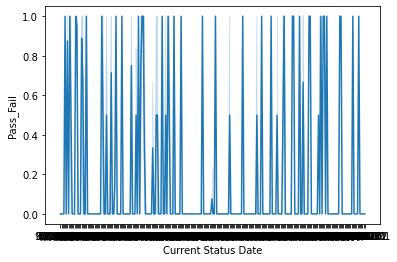

In [61]:
seaborn.lineplot(data=clean_dogs_df, x='Current Status Date', y='Pass_Fail')